# Анализ оттока клиентов банка "Метанпромбанк"

<p>Датасет содержит данные о клиентах банка «Метанпром». Банк располагает филиалами в
Ярославле и двух областных городах: Ростов Великий и Рыбинск. Заказчиком данного исследования является отдел маркетинга банка.

<p><b>Цель исследования</b> - проанализировать клиентов регионального банка и выделить сегменты, которые склонны уходить из банка.

<p><b>Задачи</b>
    <ol>
        <li>Провести исследовательский анализ данных, определите все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравнить портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.п)
        <li>Сформулировать и проверить статистические гипотезы. Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались. Сформулировать и проверить статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование
        <li>Cформировать сегменты, отобрать из них наиболее "отточные"
        <li>Сформулировать общие выводы и рекомендации
    </ol>            
<p><b>Декомпозиция</b>
<ol>
    <li>Загрузка и знакомство с данными:
        <ul>
            <li>Импорт библиотек;
            <li>Загрузка датасета;
            <li>Вывод описательной статистики.        
        </ul>
    <li>Предобработка для дальнейшего анализа:
        <ul>
            <li>Проверка заголовков;
            <li>Изменение типов данных (при необходимости);
            <li>Поиск и обработка дубликатов;
            <li>Работа с пропусками.
        </ul>
    <li>Исследовательский анализ (EDA):
        <ul>
            <li>Построение графиков для обнаружения выбросов в данных;
            <li>Визуализация распределения основных признаков по оттоку;
            <li>Определение признаков наиболее влияющих на отток;
            <li>Сегментация клиентов на основе полученных закономерностей.
        </ul>
    <li>Формулировка и проверка гипотез.
    <li>Общие выводы и рекомендации.    
</ol>

## Загрузка и знакомство с данными

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

In [2]:
# путь к файлу
path = 'https://code.s3.yandex.net/datasets/bank_scrooge.csv'

# пробуем прочесть содержимое файла
try:
    df = pd.read_csv(path)
except FileNotFoundError:
    print('Невозможно открыть файл!')
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


<p>Вывод: Датасет состоит из 10 тыс. записей. В полях "age" и "balance" обнаружены пропущенные значения.

In [4]:
# описательная статистика для количественных полей датасета
df.describe().applymap(lambda x: f"{x:.0f}")

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000,10000,9974,10000,7705,10000,10000,10000,10000,10000
mean,171815,849,43,3,827794,2,1,1,147867,0
std,33708,65,12,2,1980614,1,0,0,139389,0
min,94561,642,18,0,0,0,0,0,2546,0
25%,142810,802,33,0,295554,1,0,0,75252,0
50%,172728,853,40,3,524272,2,1,1,119658,0
75%,201262,900,51,4,980706,2,1,1,174501,0
max,229145,1000,86,9,119113552,5,1,1,1395064,1


In [5]:
# уникальные значения категориальных полей
df[['equity', 'products', 'city', 'gender']].nunique()

equity      10
products     6
city         3
gender       2
dtype: int64

<div class="alert alert-info">Данные содержат записи о 10 тыс клиентах.
<ul>Поля с количественными значениями:
    <li>score
    <li>age
    <li>balance
    <li>est_salary
</ul>
<ul>Поля с категориальными:
    <li>equity
    <li>products
    <li>credit_card
    <li>last_activity
    <li>churn    
</ul>
Метод <i>describe</i> дает нам общее представление о том как распределены значения количественных полей. Так score имеет размах от 642 до 1000 баллов. Возраст представлен диапазоном от 18 до 86 лет. Также мы предполагаем, что значения баланса и дохода имеют выбросы, так как экстремумы очень далеки от среднего значения.  
    
</div>    

## Предобработка

### Заголовки

In [6]:
# приводим заголовки к нижнему регистру
df.columns = [i.lower() for i in df.columns]
# проверка изменений
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Дубликаты

In [7]:
# список дубликатов
list_of_duplicates = df[df['userid'].duplicated() == True]['userid'].to_list()

# отбор дублирующих записей
duplicates = df.query('userid in @list_of_duplicates')

# присвоение имени индексу для дальнейшей сортировки
duplicates.index.name = 'idx_number'

# первые 7 дублирующих записей таблицы
duplicates.sort_values(by=['userid', 'idx_number'])[:14]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
idx_number,,,,,,,,,,,,
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1


In [8]:
print(f'Доля записей с дубликатами: {duplicates.shape[0] / df.shape[0]:.2%}')

Доля записей с дубликатами: 1.46%


In [9]:
print(f"""Колличество отточных клиентов среди дубликатов в филиалах (Рыбинск и Ростов Великий):
{duplicates.query('city != "Ярославль"')['churn'].sum()}
       """)

Колличество отточных клиентов среди дубликатов в филиалах (Рыбинск и Ростов Великий):
21
       


*Вывод: Обнаружены 73 дублирующих строки. Не удалось выяснить причину их происхождения, предположение о верности выбора в пользу новейшей записи (больший индекс) не подтвердилось. Пример <b>userid 120258</b>: первая строчка говорит о том, что клиент женского пола 38 лет, а следующая (более свежая) уже указывает на мужчину 30 лет. Даже если предположить смену пола (что более чем вероятно), то сокращение возраста никак не согласуется с логикой. Если принять во внимание только записи относящиеся к центру (город Ярославль) будет потеряна информация об 21-ом клиенте отказавшемся от услуг банка. Общая доля всех дубликатов составляет около 1.5 процентов, что говорит о том, что данными можно пренебречь.*

In [10]:
# создадим копию датасета во избежание потери данных
bank_scrooge = df.copy()

# исключим все дубликаты из данных
bank_scrooge = bank_scrooge.query('userid not in @list_of_duplicates')

# проверка
print(f"Количество записей после удаления: {bank_scrooge.shape[0]}")

Количество записей после удаления: 9854


### Данные противоречащие логике

In [11]:
# распределение клиентов по количеству банковских продуктов
bank_scrooge['products'].value_counts()

2    5070
1    3287
3    1021
4     457
5      18
0       1
Name: products, dtype: int64

<p>Последняя строчка противоречит логике - лицо банка не пользующееся ни одним из продуктов не может быть клиентом банка. Исключим данную запись из данных.

In [12]:
# исключим строчку с нулевым кол-ом продуктов
bank_scrooge = bank_scrooge[bank_scrooge['products'] > 0]

# проверка
print(f"Количество записей после удаления: {bank_scrooge.shape[0]}")

Количество записей после удаления: 9853


In [13]:
# снова взглянем на пропуски
bank_scrooge.isna().sum()

userid              0
score               0
city                0
gender              0
age                 3
equity              0
balance          2245
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

После исключения дубликатов существенно уменьшилось число пропусков в поле age - с 26 до 3. Количество пропусков в ячейках баланса остается высоким, 2245. Ручное заполнение может привести к искажению результатов, поэтому принимаем решение оставить ячейки не тронутыми. Вернемся к пропускам в исследовательской части проекта и посмотрим насколько они важны для результатов.

### Пропущенные значения  

In [14]:
# датасет с пропусками
df_nan = bank_scrooge[(bank_scrooge['age'].isna()) | (bank_scrooge['balance'].isna())]
df_nan.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0


In [15]:
print(f'Доля пропусков: {df_nan.shape[0] / bank_scrooge.shape[0]:.1%}')


Доля пропусков: 22.8%


In [16]:
bank_scrooge.shape[0]

9853

In [17]:
df_nan.value_counts('churn', normalize=True).mul(100).round(2)

churn
0    99.42
1     0.58
dtype: float64

Меньше одного процента клиентов из датасета с пропусками являются отточными.

''

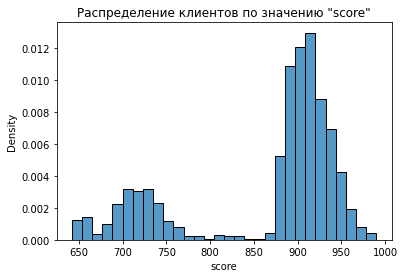

In [18]:
sns.histplot(data=df_nan, 
             stat="density", 
             common_norm=False, 
             bins=30, x='score'
             )
plt.title('Распределение клиентов по значению "score"')
;

In [19]:
# присвоим найденным группам label 
df_nan['label'] = (
    np.where(df_nan['score'].between(700, 750), "low_score",
    np.where(df_nan['score'].between(870, 950), "high_score", 
    'other'
        )
    )
)    

/tmp/ipykernel_122/1370139394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['label'] = (


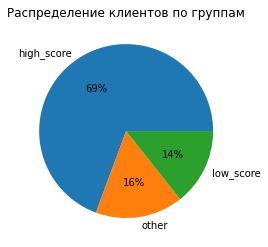

In [20]:
df_nan.value_counts('label', normalize=True) \
      .plot(kind='pie', 
            title='Распределение клиентов по группам', 
            ylabel='',
            autopct='%1.0f%%'
           );

Заметно разделение клиентов на группу с низким рейтингом (от 700 до 750 баллов) и высоким (от 870 до 950). Около 70% всех пропущенных значений имеют высокий рейтинг.

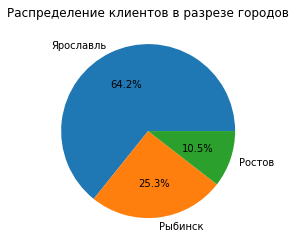

In [21]:
df_nan.value_counts('city', normalize=True) \
      .plot(kind='pie', 
            title='Распределение клиентов в разрезе городов', 
            ylabel='',
            autopct='%1.1f%%'
           );

Среди проопущенных значений "львиную долю" составляет Ярославль с 64.2%, затем идет Рыбинск - 25.3% и Ростов Великий - 10.5%.

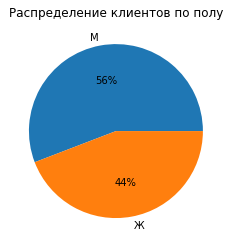

In [22]:
df_nan.value_counts('gender', normalize=True) \
      .plot(kind='pie', 
            title='Распределение клиентов по полу', 
            ylabel='',
            autopct='%1.0f%%'
           );

Незначительный перевес имеют клиенты мужского пола: 56% против 44%.

''

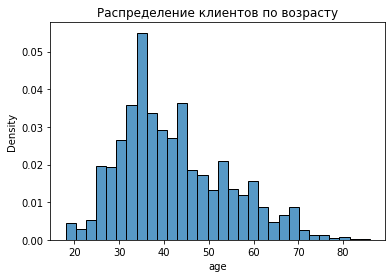

In [23]:
sns.histplot(data=df_nan, 
             stat="density", 
             common_norm=False, 
             bins=30, x='age'
             )
plt.title('Распределение клиентов по возрасту')
;

In [24]:
print(f"""Средний возраст клиентов {df_nan['age'].mean():.0f}
Медианный возраст записей с пропусками {df_nan['age'].median():.0f}
""")

Средний возраст клиентов 42
Медианный возраст записей с пропусками 40



Визуально распределение напоминает нормальное распределение с небольшой правосторонней скошенностью. Большая часть наблюдений сосредоточена между 30 и 45 годами.

In [25]:
# распределение по equity
df_nan.value_counts('equity', normalize=True).mul(100).round(2)    

equity
0    94.80
1     5.12
3     0.04
5     0.04
dtype: float64

**Только 5% из тех кто не имеет записи в графе баланс имеет 1 балл/объект недвижимости. У остальных клиентов банка баллов/объектов нет.**

''

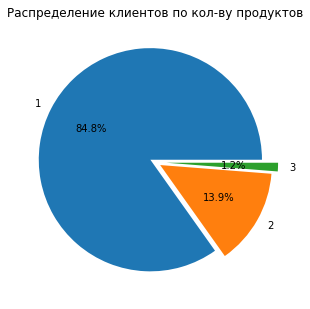

In [26]:
explode = (0.05, 0.05, 0.1)
df_nan.value_counts('products', normalize=True) \
      .plot(kind='pie', 
            title='Распределение клиентов по кол-ву продуктов', 
            ylabel='',
            autopct='%1.1f%%',
            figsize=(5, 7),
            explode=explode
           )
;

<ul>
    <li>~ 85% - пользуются одним продуктом
    <li>~ 14% - двумя
    <li>1% - тремя
</ul>    

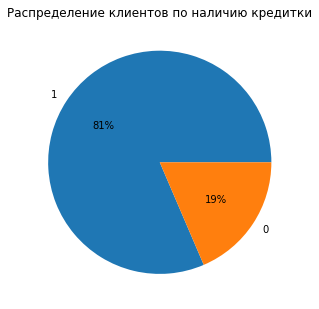

In [27]:
df_nan.value_counts('credit_card', normalize=True) \
      .plot(kind='pie', 
            title='Распределение клиентов по наличию кредитки', 
            ylabel='',
            autopct='%1.0f%%',
            figsize=(5, 7),
           );

<ul>
    <li> ~ 81% имею кредитную карту банка
    <li> ~ 19% не имеют
</ul>    

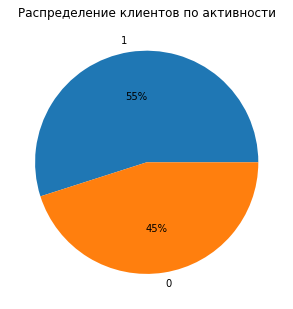

In [28]:
df_nan.value_counts('last_activity', normalize=True) \
      .plot(kind='pie', 
            title='Распределение клиентов по активности', 
            ylabel='',
            autopct='%1.0f%%',
            figsize=(5, 7),
           );

In [29]:
df_nan['est_salary'].min()

20274.03

Активных клиентов (обращение в течение последнего месяца) среди тех у кого не указан баланс чуть больше - 55%.

''

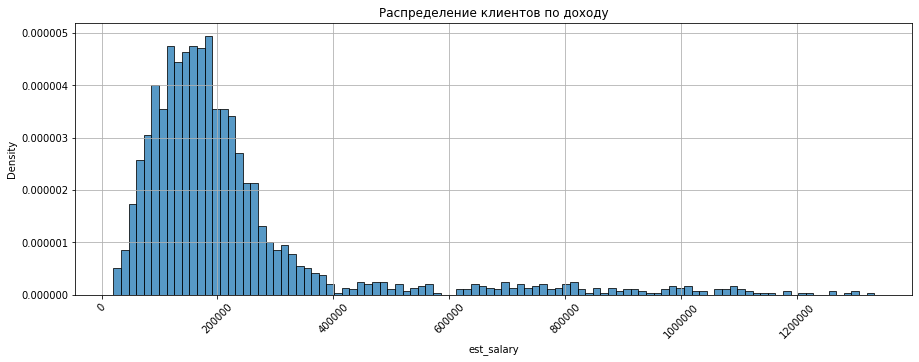

In [30]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df_nan, 
             stat="density", 
             bins=100, x='est_salary'
             )
plt.grid(True)
plt.title('Распределение клиентов по доходу')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
;

График имеет длинный "хвост" с правой стороны что говорит о асимметрии распределения. Для определения ядра уменьшим диапазон дохода до 300 т.р. и посмотрим на то, как распределились клиенты.

''

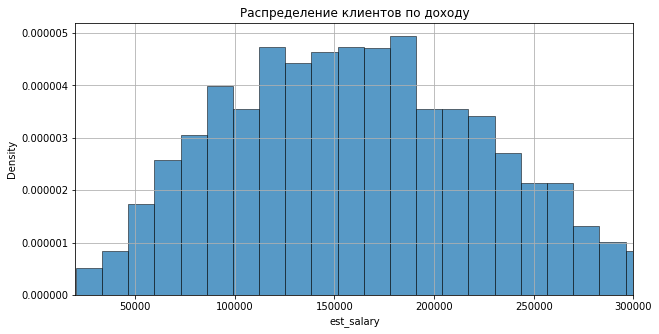

In [31]:
plt.figure(figsize=(10, 5))

ax = sns.histplot(data=df_nan, 
             stat="density", 
             bins=100, x='est_salary'
             )
ax.set_xlim(20000, 300000)
plt.grid(True)
plt.title('Распределение клиентов по доходу')
plt.ticklabel_format(style='plain')
;

Большинство клиентов с пропуском в графе 'баланс' имеют доход от 70 до 250 тыс.руб.

/tmp/ipykernel_122/4179323719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['salary_level'] = (


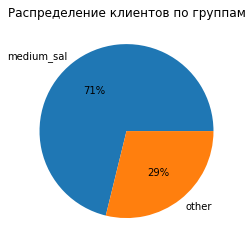

In [32]:
# присвоим найденным группам label 
df_nan['salary_level'] = (
    np.where(df_nan['est_salary'].between(70000, 250000), "medium_sal", 'other'
    )
)
df_nan.value_counts('salary_level', normalize=True) \
      .plot(kind='pie', 
            title='Распределение клиентов по группам', 
            ylabel='',
            autopct='%1.0f%%'
           );

Более 70% клиентов с пропусками имеют средний доход.


**Вывод: Почти 23% записей оказались с пропущенными значениями в графах age (3) и balance (2245). Эти данные характеризуются минимальным процентом оттока (меньше 1%). Возрастное ядро представлено клиентами от 30 до 45 лет. Это в основном (95%) клиенты не имеющие объектов недвижимости, использующие 1 либо 2 банковских продукта с ежемесячным доходом 70 - 250 тыс. руб., более 80% которых имеют кредитную карту. В ходе рассмотрения данных имеющих пропуски не удалось установить окончательную прчину отсутствия пропусков, предположим, какой-то системный сбой в результате которого данные были утеряны.**  

### Бинарное кодирование категориальных полей: gender, city, equity и products

*Чтобы рассчитать корреляцию применим методы бинарного кодирования к некоторым столбцам датасета*

In [33]:
banks_data = pd.get_dummies(bank_scrooge, columns=['gender', 'city', 'equity', 'products'], drop_first=False)

In [34]:
# вернем прежние колонки в новый датасет
return_cols = ['gender', 'city', 'equity', 'products']

for col in return_cols:
    banks_data[col] = bank_scrooge[col]

## Исследовательский анализ данных (EDA)

Для начала рассчитаем общий процент оттока по банку

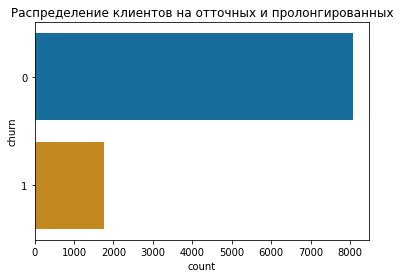

In [35]:
# распределение клиентов банка
sns.countplot(y='churn', data=banks_data, palette='colorblind')
plt.title('Распределение клиентов на отточных и пролонгированных')
plt.show()

In [36]:
# рассчитаем общий процент отточных клиентов в целом
total_churn = banks_data['churn'].sum() / banks_data.shape[0]
print(f'Процент оттока по банку: {total_churn:.2%}')

Процент оттока по банку: 17.95%


### Проверка на выбросы в данных

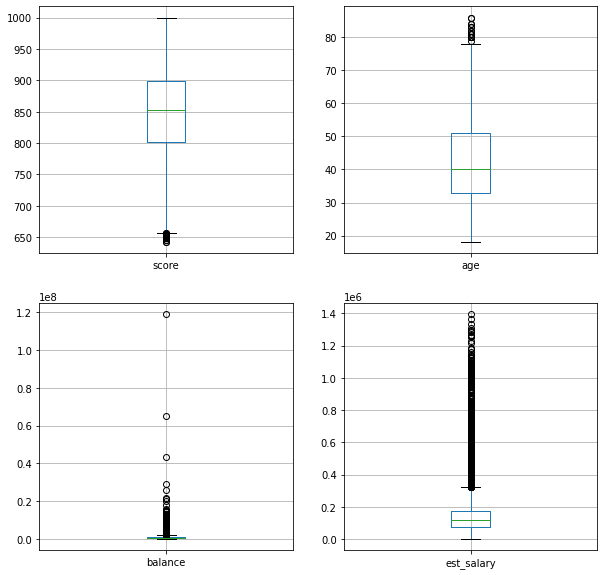

In [37]:
# Взглянем на поля датасета которые могут содержать выбросы
cols = ['score', 'age', 'balance', 'est_salary']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for cnt, col in enumerate(cols):
    banks_data.boxplot(column=col, 
                         ax=axes.flat[cnt],
                         grid=True
                        ) 

**По двум первым графикам (score и age) можно утверждать об отсутствии явных выбросов в данных. Для определенния верхних границ значений двух оставшихся можно использовать персентили и межквартильный размах.**

In [38]:
# найдем границу для баланса
q1_b = banks_data['balance'].quantile(0.25)
q3_b = banks_data['balance'].quantile(0.75)
iqr_b = q3_b - q1_b

top_limit_b = q3_b + (1.5 * iqr_b)

print(f"""
    Верхняя граница баланса: {top_limit_b:.2f} руб.
""")
# ограничим данные найденной границей в 2 млн. руб.
filtered_balance = banks_data.query('balance < @top_limit_b')


    Верхняя граница баланса: 1996926.03 руб.



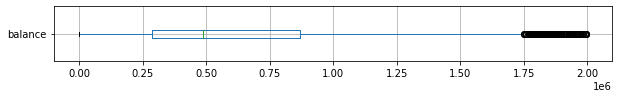

In [39]:
filtered_balance.boxplot(column='balance', vert=False, figsize=(10, 1));

In [40]:
# найдем границу для дохода
q1_s = banks_data['est_salary'].quantile(0.25)
q3_s = banks_data['est_salary'].quantile(0.75)
iqr_s = q3_s - q1_s

top_limit_s = q3_s + (1.5 * iqr_s)

print(f"""
    Верхняя граница дохода: {top_limit_s:.2f} руб.
    """)


    Верхняя граница дохода: 323591.59 руб.
    


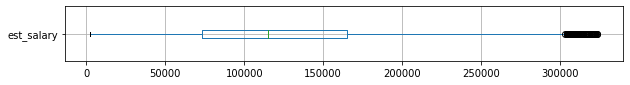

In [41]:
filtered_salary = banks_data.query('est_salary < @top_limit_s')
filtered_salary.boxplot(column='est_salary', vert=False, figsize=(10, 1));

*Используя обе границы ограничим значения обоих полей*


In [42]:
filtered_all = banks_data.query('balance < @top_limit_b & est_salary < @top_limit_s')
print(f'Процент потери данных при ограничении {1 - (filtered_all.shape[0] / banks_data.shape[0]):.2%}')

Процент потери данных при ограничении 27.66%


In [43]:
def relation_func(feature, df=filtered_all):
    # функция для расчета и вывода процентного соотношения    
    print(f'{df.value_counts(feature, normalize=True).mul(100).round(2)}')

### Корреляция с оттоком

In [44]:
# фильтрующий список
filtered_list = ['userid', 'gender', 'city', 'equity', 'products', 'churn']

# отфильтрованный список
features = list(filter(lambda x: x not in filtered_list, banks_data.columns))

# выведем последовательно коэффициент корреляции для всех признаков
for feature in features:
    print(f'Корреляция между {feature} и оттоком {filtered_all[feature].corr(filtered_all["churn"]):.2f}\n')

Корреляция между score и оттоком 0.17

Корреляция между age и оттоком -0.07

Корреляция между balance и оттоком 0.18

Корреляция между credit_card и оттоком -0.09

Корреляция между last_activity и оттоком 0.20

Корреляция между est_salary и оттоком 0.11

Корреляция между gender_Ж и оттоком -0.17

Корреляция между gender_М и оттоком 0.17

Корреляция между city_Ростов и оттоком -0.00

Корреляция между city_Рыбинск и оттоком -0.04

Корреляция между city_Ярославль и оттоком 0.04

Корреляция между equity_0 и оттоком -0.02

Корреляция между equity_1 и оттоком -0.06

Корреляция между equity_2 и оттоком -0.06

Корреляция между equity_3 и оттоком -0.02

Корреляция между equity_4 и оттоком 0.01

Корреляция между equity_5 и оттоком 0.09

Корреляция между equity_6 и оттоком 0.03

Корреляция между equity_7 и оттоком 0.05

Корреляция между equity_8 и оттоком 0.01

Корреляция между equity_9 и оттоком 0.03

Корреляция между products_1 и оттоком -0.06

Корреляция между products_2 и оттоком -0.09

Корре

<div class="alert alert-info">Расчитанные коэффициенты говорят о незначительной корреляции оттока с некоторыми характеристиками. Среди которых:
    <li>products_4 (клиенты с 4-мя продуктами) - 0.21
    <li>last_activity (взаимодействие с банком в течение последнего месяца) - 0.20
    <li>balance (баланс счета) - 0.18
    <li>score (Баллы кредитного скорринга) - 0.17
    <li>gender_М (мужчины) - 0.17
    <li>gender_Ж (женщины) - отрицательная корреляция 0.17    
    

### Распределение признаков

#### Баллы кредитного скорринга

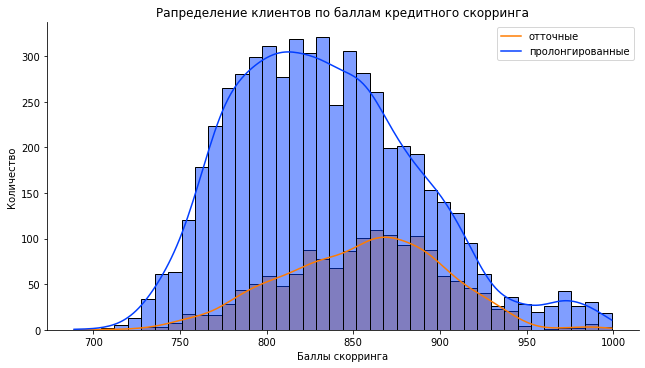

In [45]:
# Плотность распределения пролонгированных и отточных клиентов
sns.displot(data=filtered_all, 
            x='score', 
            hue='churn', 
            kind='hist',
            kde=True,
            fill=True,
            palette=sns.color_palette('bright')[:2], 
            legend=False,
            aspect=15/8.27
)
plt.title('Рапределение клиентов по баллам кредитного скорринга')
plt.legend(loc=1, labels=['отточные', 'пролонгированные'])
plt.xlabel('Баллы скорринга')
plt.ylabel('Количество')
plt.show()

**Как видно из графика, наибольшее число "отточных" клиентов с рейтингом от 850 до 900.**

#### Возраст

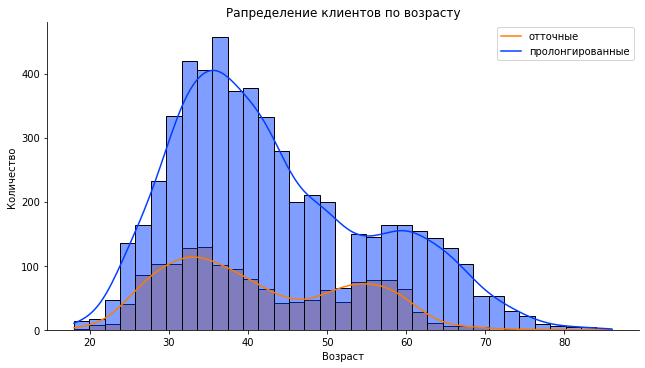

In [46]:
sns.displot(data=filtered_all, 
            x='age', 
            hue='churn', 
            kind='hist',
            kde=True,
            fill=True,
            palette=sns.color_palette('bright')[:2], 
            legend=False,
            aspect=15/8.27
)
plt.title('Рапределение клиентов по возрасту')
plt.legend(loc=1, labels=['отточные', 'пролонгированные'])
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

<p><b>Распределение оттока имеет две небольших вершины:
    <ul>
        <li>от 30 - 35 лет
        <li>от 53 - 57 лет   
    </ul>

#### Локация

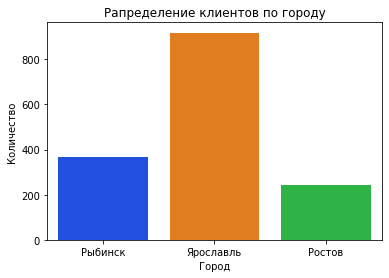

In [47]:
sns.countplot(x=filtered_all.query('churn == 1')['city'], 
              palette=sns.color_palette('bright')[:3]
             )
plt.title('Рапределение клиентов по городу')
plt.xlabel('Город')
plt.ylabel('Количество')
plt.show()

In [48]:
# процентное соотношение клиентов банка
relation_func('city')

city
Ярославль    56.41
Рыбинск      27.51
Ростов       16.08
dtype: float64


**Наибольшее кол-во отточных клиентов принадлежат центральному офису, затем идет Рыбинск и Ростов Великий. Ничего удивительного, так более половины клиентов (~ 58.5 %) относяться к Ярославлю.**

#### Баланс на счёте

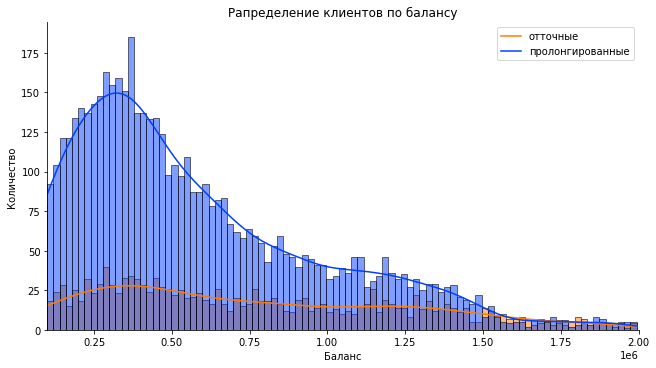

In [49]:
sns.displot(data=filtered_all, 
            x='balance', 
            hue='churn', 
            kind='hist',
            bins=100,
            kde=True,
            fill=True,
            palette=sns.color_palette('bright')[:2], 
            legend=False,
            aspect=15/8.27
)
plt.title('Рапределение клиентов по балансу')
plt.legend(loc=1, labels=['отточные', 'пролонгированные'])
plt.xlabel('Баланс')
plt.ylabel('Количество')
plt.xlim(100000, 2000000)
plt.show()

In [50]:
relation_func('churn', filtered_all[filtered_all['balance']<100000])

churn
0    85.22
1    14.78
dtype: float64


**Распределение клиентов по балансу не позволяет выделить отличительные сегменты - кривые схожи по своему характеру.**

#### Наличие кредитной карты

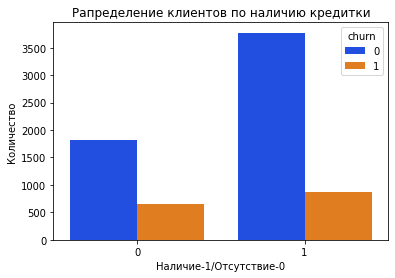

In [51]:
sns.countplot(data=filtered_all, 
              x='credit_card', 
              hue='churn', 
              palette=sns.color_palette('bright')[:2])
plt.title('Рапределение клиентов по наличию кредитки')
plt.xlabel('Наличие-1/Отсутствие-0')
plt.ylabel('Количество')
plt.show()

In [52]:
relation_func('credit_card')

credit_card
1    65.17
0    34.83
dtype: float64


**Чуть больший отток наблюдается среди владельцев кредитной карты.**

#### Пол

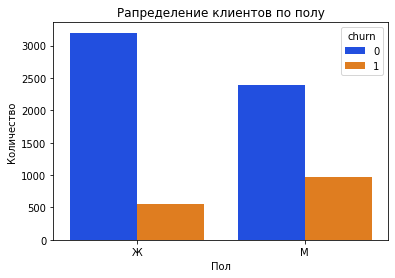

In [53]:
sns.countplot(data=filtered_all, 
              x='gender', 
              hue='churn', 
              palette=sns.color_palette('bright')[:2])
plt.title('Рапределение клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

In [54]:
relation_func('gender')

gender
Ж    52.69
М    47.31
dtype: float64


**Мужчины более подвержены оттоку нежели женщины, несмотря на то, что количественно уступают - 47% против 53%.**

#### Активность

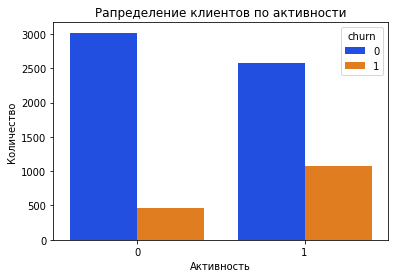

In [55]:
sns.countplot(data=filtered_all, 
              x='last_activity', 
              hue='churn', 
              palette=sns.color_palette('bright')[:2])
plt.title('Рапределение клиентов по активности')
plt.xlabel('Активность')
plt.ylabel('Количество')
plt.show()

In [56]:
# соотношение отточных клиентов среди активных
relation_func('last_activity', filtered_all[filtered_all['churn']==1])

last_activity
1    70.17
0    29.83
dtype: float64


**Процент оттока среди активных клиентов (тех кто взаимодействовал с банком в течение последнего месяца) гораздо выше всех остальных, свыше 70 процентов.**

#### Месячный доход

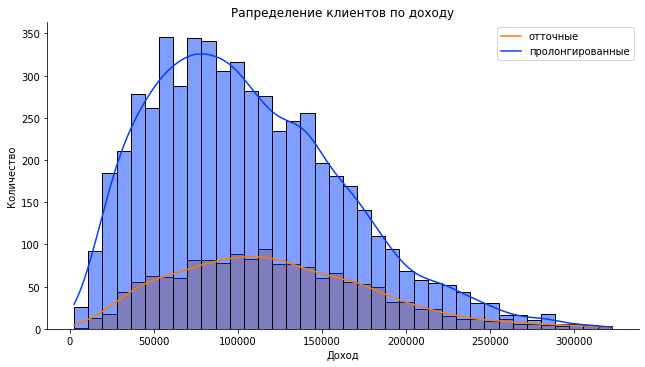

In [57]:
sns.displot(data=filtered_all, 
            x='est_salary', 
            hue='churn', 
            kind='hist',
            kde=True,
            fill=True,
            palette=sns.color_palette('bright')[:2], legend=False, 
            aspect=15/8.27
)
plt.title('Рапределение клиентов по доходу')
plt.legend(loc=1, labels=['отточные', 'пролонгированные'])
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.show()

**Исходя из графика распределения можно выделить группу оттока с доходом от 75 тыс. до 150 тыс.**

#### Кол-во баллов/объектов собственности

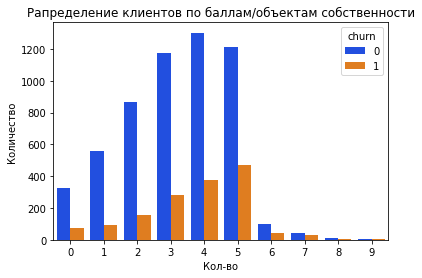

In [58]:
sns.countplot(data=filtered_all, 
              x='equity', 
              hue='churn', 
              palette=sns.color_palette('bright')[:2],
              )
plt.title('Рапределение клиентов по баллам/объектам собственности')
plt.xlabel('Кол-во')
plt.ylabel('Количество')
plt.show()

<p><b>График говорит нам о двух сегментах:
<ul>
    <li>от 0 до 5-ти баллов - здесь сосредоточена "львиная доля" всех клиентов;
    <li>более 5-ти баллов - гораздо меньший по объему, но с высоким уровнем оттока.
</ul>        
</b>    

In [59]:
# процентное соотношение клиентов до 5-ти баллов (включительно)
relation_func('churn', filtered_all[filtered_all['equity'] < 6])

churn
0    78.99
1    21.01
dtype: float64


In [60]:
# процентное соотношение клиентов свыше 5-ти баллов
relation_func('churn', filtered_all[filtered_all['equity'] > 5])

churn
0    64.58
1    35.42
dtype: float64


Отток по второй выборке составил более 35%.

#### Количество продуктов, которыми пользуется клиент

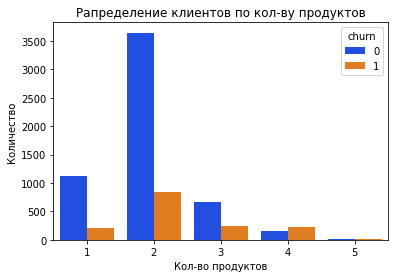

In [61]:
sns.countplot(data=filtered_all, 
              x='products', 
              hue='churn', 
              palette=sns.color_palette('bright')[:2],
              )
plt.title('Рапределение клиентов по кол-ву продуктов')
plt.xlabel('Кол-во продуктов')
plt.ylabel('Количество')
plt.show()

In [62]:
# соотношение клиентов по кол-ву продуктов
relation_func('products')

products
2    62.98
1    18.74
3    12.72
4     5.30
5     0.25
dtype: float64


In [63]:
# соотношение отточных клиентов пользующихся 4-мя продуктами
relation_func('churn', filtered_all[filtered_all['products']==4])

churn
1    58.47
0    41.53
dtype: float64


**Наибольшее кол-во клиентов пользуется двумя продуктами банка - 63%. Среди тех кто использует 4 продукта отток составил больше 58%.**

<font color="maroon"><b>Вывод:</b> На основе проделанного анализа можно выделить несколько факторов наиболее влияющих на отток:
    <ul>
        <li>балл кредитного скорринга
        <li>пол
        <li>возраст
        <li>кол-во баллов/объектов собственности
        <li>кол-во используемых продуктов банка    
    </ul>    
        Превалируют клиенты мужского пола, в возрасте от 30 до 35 или 53 - 57 лет, относящиеся к Ярославлю, взаимодействовашие с банком за последний месяц, имеющие больше 5-ти объектов собственности, с 3-мя или 4-мя продуктами.    

<p><b>Факторы по которым группы клиентов (отточные/пролонгированные) имеют отличия:</b>
    <ul>
        <li><i>пол</i>, кленты мужского пола имеют больший отток;
        <li><i>наличие кредитной карты</i>, среди держателей отток ниже;
        <li><i>активность за последний месяц</i>, отток больше среди тех, кто недавно обращался в банк;
        <li><i>количество баллов/объектов недвижимости</i>, наблюдается высокий процент оттока среди владельце 6-ти и более объектов недвижимости;
        <li><i>количество используемых продуктов</i>, значительный отток наблюдается у клиентов от 3-ёх и выше.    
    </ul>  

### Сегментация клиентов

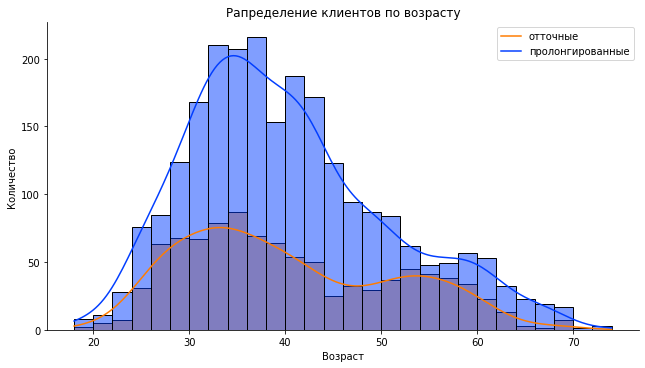

In [64]:
# выделим в отдельный датасет мужскую часть клиентов
male = filtered_all[filtered_all['gender']=='М']
sns.displot(data=male, 
            x='age', 
            hue='churn', 
            kind='hist',
            kde=True,
            fill=True,
            palette=sns.color_palette('bright')[:2], 
            legend=False,
            aspect=15/8.27
)
plt.title('Рапределение клиентов по возрасту')
plt.legend(loc=1, labels=['отточные', 'пролонгированные'])
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

#### Сегмент A (segment_A)

In [65]:
# отфильтруем мужчин по возрасту
age_list = [i for i in range(30, 56)]
segment_A = male.query('age in @age_list')
print(f"""Процент мужчин, в возрасте от 30 - 55 лет от общего числа клиентов банка: 
    {segment_A.shape[0] / filtered_all.shape[0]:.0%}
"""
)

Процент мужчин, в возрасте от 30 - 55 лет от общего числа клиентов банка: 
    35%



In [66]:
ratio_segmentA = segment_A.value_counts('churn', normalize=True).mul(100).round().iloc[1]

#### Сегмент В (segment_B)

In [67]:
segment_B = filtered_all.query('equity > 5 | products > 2')

In [68]:
print(f"""Процент клиентов с баллами выше 5-ти или больше 2-ух продуктов от общего числа клиентов банка: 
    {segment_B.shape[0] / filtered_all.shape[0]:.0%}
"""
)

Процент клиентов с баллами выше 5-ти или больше 2-ух продуктов от общего числа клиентов банка: 
    21%



In [69]:
ratio_segmentB = segment_B.value_counts('churn', normalize=True).mul(100).round().iloc[1]

#### Сегмент С (segment_C)

In [70]:
segment_C = male.query('800 < score < 900')
print(f"""Процент мужчин с баллами скорринга от 800 до 900 от общего числа клиентов банка: 
    {segment_C.shape[0] / filtered_all.shape[0]:.0%}
"""
)

Процент мужчин с баллами скорринга от 800 до 900 от общего числа клиентов банка: 
    28%



In [71]:
ratio_segmentC = segment_C.value_counts('churn', normalize=True).mul(100).round().iloc[1]

In [72]:
# соберем все показатели сегментов в одну таблицу
data = {
    'segment_name': ['A', 'B', 'C'],
    'volume': [segment_A.shape[0], segment_B.shape[0], segment_C.shape[0]],
    'churn_quntity': [segment_A['churn'].sum(), segment_B['churn'].sum(), segment_C['churn'].sum()],
    'churn_percent': [ratio_segmentA, ratio_segmentB, ratio_segmentC]                                           
       }

agg_data = pd.DataFrame(data=data)
display(agg_data)                                               

,segment_name,volume,churn_quntity,churn_percent
0,A,2490,679,27.0
1,B,1473,527,36.0
2,C,2016,663,33.0


<i>Приоретизация выделенных сегментов:</i>
<li>на первое место выходит сегмент <b>С</b> с <b>охватом более 2 тыс.</b> клиентов и уровнем <b>оттока в 33%</b>;
<li>на второе место сегмент <b>B</b> с самым высоким показателем <b>оттока 36%</b> и охватом <b>около 1.5 тыс</b> клиентов;
<li>на третье место оставшийся сегмент <b>A</b> c наибольшим охватом <b>около 2.5 тыс</b>, но с самым низким уровнем <b>оттока 27%</b>. 

**Визуализации сегментов**

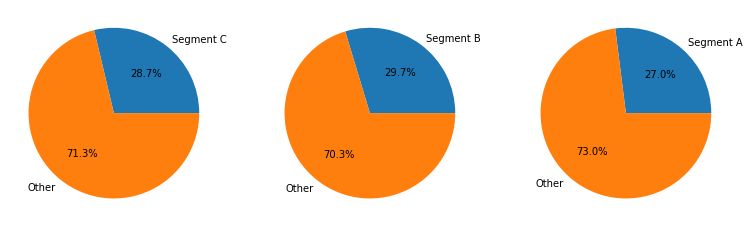

In [73]:
labelsA = 'Segment A', 'Other'
valuesA = [ratio_segmentA, 100 - ratio_segmentA]

labelsB = 'Segment B', 'Other'
valuesB = [ratio_segmentA, 100 - ratio_segmentB]

labelsC = 'Segment C', 'Other'
valuesC = [ratio_segmentA, 100 - ratio_segmentC]

plt.figure(figsize=[13, 5])

# сегмент C
plt.subplot(1, 3, 1)
plt.pie(valuesC, labels=labelsC, autopct='%1.1f%%');

# сегмент B
plt.subplot(1, 3, 2)
plt.pie(valuesB, labels=labelsB, autopct='%1.1f%%');

# сегмент А
plt.subplot(1, 3, 3)
plt.pie(valuesA, labels=labelsA, autopct='%1.1f%%');

Уровень оттока всех сегментов превышает процент по банку в целом, около 18-ти процентов.

## Формулирование и проверка гипотез

<p><b>Первая гипотеза:</b>

H<sub>0</sub>: Средний доход отточных и пролонгированных клиентов одинаков.

H<sub>1</sub>: Средний доход отточных и пролонгированных клиентов различается.
    
**Для проверки воспользуемся обычным t-тестом для двух независимых генеральных совокупностей.**    

In [74]:
churn_salary = filtered_all[filtered_all['churn']==1]['est_salary']
prolong_salary = filtered_all[filtered_all['churn']==0]['est_salary']

results1 = st.ttest_ind(churn_salary, prolong_salary)

alpha = 0.05 / 2 # по причине двусторонней проверки

if results1.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу: между средними доходами есть различия: p-value {results1.pvalue}')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние доходы разными: p-value {results1.pvalue}')

Отвергаем нулевую гипотезу: между средними доходами есть различия: p-value 8.763471246474145e-20


<p><b>Вторая гипотеза:</b>

H<sub>0</sub>: Средний возраст отточных и пролонгированных клиентов одинаков.

H<sub>1</sub>: Средний возраст отточных и пролонгированных клиентов различается.
    
**Для проверки воспользуемся все тем же t-тестом для двух независимых генеральных совокупностей.** 

In [75]:
churn_age = filtered_all[filtered_all['churn']==1]['age'].dropna()
prolong_age = filtered_all[filtered_all['churn']==0]['age'].dropna()

results2 = st.ttest_ind(churn_age, prolong_age)

alpha = 0.05 / 2 # по причине двусторонней проверки

if results2.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу: средний возраст групп имеет различия: p-value {results2.pvalue}')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу, нет оснований считать возраст групп различным: p-value {results2.pvalue}')

Отвергаем нулевую гипотезу: средний возраст групп имеет различия: p-value 3.561697324428033e-08


<font color='maroon'><b>На основе проведенных проверок обеих гипотез есть основания утверждать о том что возраст и доход различен между теми кто ушел и оставшимися клиентами.</b>

## Общие выводы и рекомендации

<p><b>ВЫВОД:</b>
    В результате исследовния удалось установить факторы наиболее влияющие на отток
    <ul>
        <li>балл кредитного скорринга
        <li>пол
        <li>возраст
        <li>кол-во баллов/объектов собственности
        <li>кол-во используемых продуктов банка
    </ul>        
<p>Именно сегмент состоящий из мужчин с баллами скорринга от 800 до 900 имеет наибольший приоритет по причине высокого процента оттока - 33% и охвата более 2-ух тысяч клиентов.
<p>Проверка гипотез о равенстве средних возраста и дохода утвердила различие показателей этих групп.    

<ol>
    <li><b>Сегмент А</b> - клиенты мужского пола в возрасте от 30 до 55 лет. Рекомендуется провести опрос удовлетворенности услугами банка с целью выявления "узких мест" в обслуживании.
    <li><b>Сегмент В</b> - клиенты имеющие более 5-ти баллов/объектов недвижимости либо пользующиеся более 2-мя продуктами. Рекомендуется пересмотр требований при выдаче кредита под залог имущества в сторону их смягчения.
    <li><b>Сегмент C</b> - клиенты мужского пола с баллами кредитного скорринга от 800 до 900. Рекомендуется проведение более детального исследования данной группы клиентов с целью выявления ключевых факторов влияющих на решение отказаться от услуг банка.  